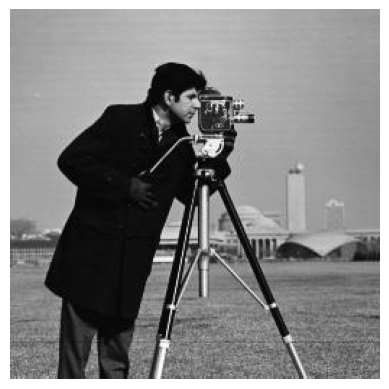

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


image = cv2.imread("photographer.bmp", cv2.IMREAD_GRAYSCALE)

# Display the image
plt.imshow(image, cmap="gray")
plt.axis("off")
plt.show()


In [2]:
rows, cols = image.shape
x, y = np.meshgrid(np.arange(cols), np.arange(rows))
preprocessed_image = image * ((-1) ** (x + y))

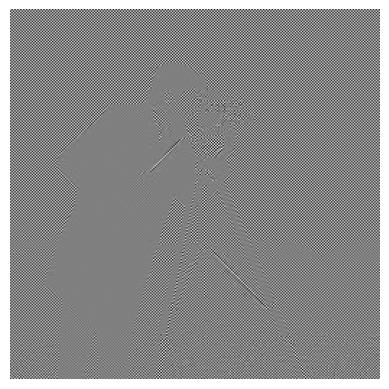

In [3]:
plt.imshow(preprocessed_image, cmap="gray")
plt.axis("off")
plt.show()

In [4]:
dft = np.fft.fft2(preprocessed_image)


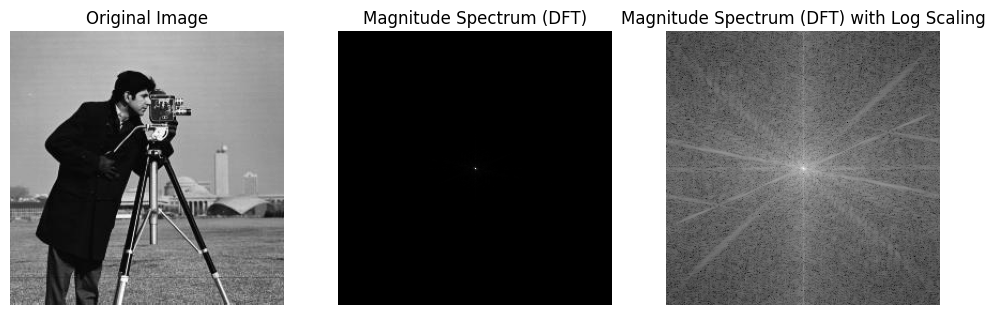

In [5]:
magnitude_spectrum = np.abs(dft)

plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
plt.imshow(image, cmap="gray")
plt.title("Original Image")
plt.axis("off")

plt.subplot(1, 3, 2)
plt.imshow(magnitude_spectrum, cmap="gray")
plt.title("Magnitude Spectrum (DFT)")
plt.axis("off")

plt.subplot(1, 3, 3)
plt.imshow(np.log(magnitude_spectrum), cmap="gray")
plt.title("Magnitude Spectrum (DFT) with Log Scaling")
plt.axis("off")

plt.show()

In [6]:
def gaussian_lowpass_filter(shape, cutoff):
    rows, cols = shape
    center_x, center_y = cols // 2, rows // 2
    x, y = np.meshgrid(np.arange(cols), np.arange(rows))
    gaussian_filter = np.exp(-((x - center_x)**2 + (y - center_y)**2) / (2 * (cutoff**2)))
    return gaussian_filter

In [7]:
lp_gaussian_filter = gaussian_lowpass_filter((rows, cols), 15)
lp_filtered_dft = dft * lp_gaussian_filter

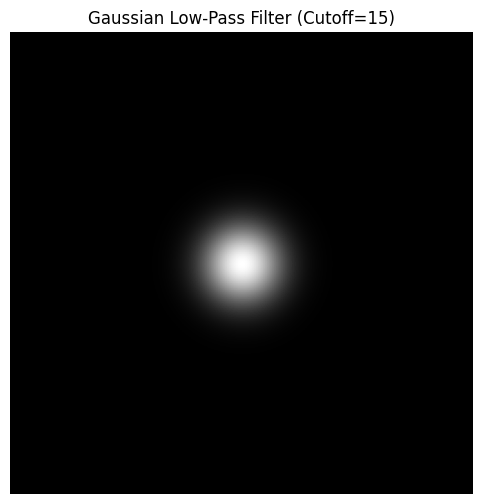

In [8]:
plt.figure(figsize=(12, 6))
plt.imshow(lp_gaussian_filter, cmap="gray")
plt.title(f"Gaussian Low-Pass Filter (Cutoff={15})")
plt.axis("off")
plt.show()
plt.show()

In [9]:
hp_gaussian_filter = 1-lp_gaussian_filter
hp_filtered_dft = dft * hp_gaussian_filter

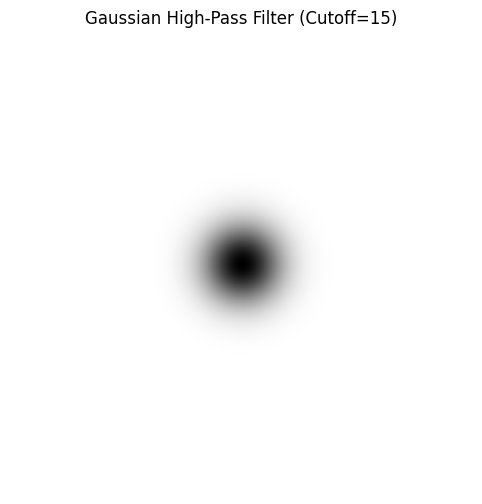

In [10]:
plt.figure(figsize=(12, 6))
plt.imshow(hp_gaussian_filter, cmap="gray")
plt.title(f"Gaussian High-Pass Filter (Cutoff={15})")
plt.axis("off")
plt.show()
plt.show()

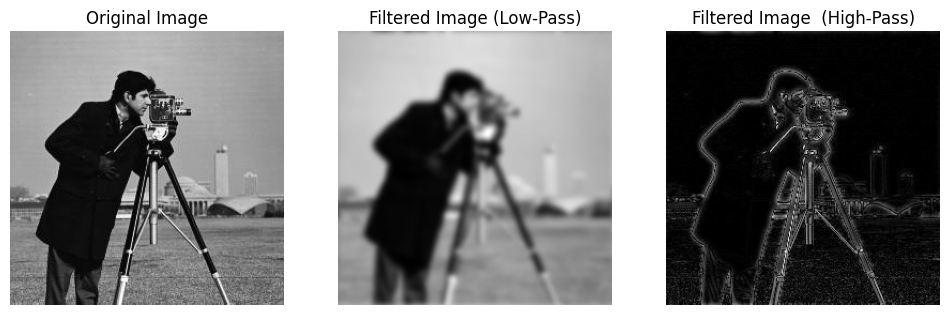

In [ ]:
lp_filtered_image = np.fft.ifft2(lp_filtered_dft)
lp_filtered_image = np.real(lp_filtered_image)  

lp_filtered_image = lp_filtered_image * ((-1) ** (x + y))

hp_filtered_image = np.fft.ifft2(hp_filtered_dft)
hp_filtered_image = np.real(hp_filtered_image)  
hp_filtered_image = hp_filtered_image * ((-1) ** (x + y))


plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
plt.imshow(image, cmap="gray")
plt.title("Original Image")
plt.axis("off")



plt.subplot(1, 3, 2)
plt.imshow(lp_filtered_image, cmap="gray")
plt.title("Filtered Image (Low-Pass)")
plt.axis("off")

plt.subplot(1, 3, 3)
plt.imshow(np.abs(hp_filtered_image), cmap="gray")
plt.title("Filtered Image  (High-Pass)")
plt.axis("off")


plt.show()